# Mobile UI Design using Prompt


In [ ]:
#import and install the necessary libraries
import warnings
warnings.filterwarnings("ignore")

In [4]:
pip install datasets transformers

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.3 MB/s eta 0:00:00


In [6]:
!pip install torch

In [7]:
!pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 27.0 MB/s eta 0:00:00


In [17]:
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
from diffusers import StableDiffusionPipeline

def initialize_models():
    """Initialize GPT-2 and Stable Diffusion models with error handling.

    Returns:
        tokenizer: The GPT-2 tokenizer.
        model: The GPT-2 model.
        pipe: The Stable Diffusion pipeline.
    """
    try:
        # Load GPT-2 tokenizer and model
        tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
        model = GPT2LMHeadModel.from_pretrained("gpt2")

        # Load Stable Diffusion model
        pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

        # Check for GPU availability and move the model to the appropriate device
        device = "cuda" if torch.cuda.is_available() else "cpu"
        pipe.to(device)
        print(f"Using {device} for image generation.")

        print("Models loaded successfully.")
        return tokenizer, model, pipe

    except Exception as e:
        print(f"Error loading models: {e}")
        return None, None, None


In [18]:
#initilize the tokenizer,model,and pipeline from the models
tokenizer, model, pipe = initialize_models()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Error loading models: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 11.06 MiB is free. Process 2679 has 14.73 GiB memory in use. Of the allocated memory 14.48 GiB is allocated by PyTorch, and 130.88 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)


In [19]:
#create a function to generate the prompt with userinput and tokenizer
def generate_prompt(user_input, tokenizer, model, max_length=50, num_return_sequences=1):
    """Generate a prompt based on user input using GPT-2."""
    try:
        prompt = f"Create a mobile UI design for: {user_input}"

        # Tokenize input prompt
        inputs = tokenizer.encode(prompt, return_tensors="pt")

        # Generate output prompt from GPT-2
        outputs = model.generate(inputs, max_length=max_length, num_return_sequences=num_return_sequences)

        # Decode the generated output into text
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

        return generated_text

    except Exception as e:
        print(f"Error generating prompt: {e}")
        return None


In [20]:
#create a function that validate the input and make sure it is not an empty string
def validate_input(user_input):
    """Check if user input is valid (not empty)."""
    if not user_input or len(user_input.strip()) == 0:
        print("Please enter a valid description.")
        return False
    return True

Welcome to the Mobile UI Design Generator!


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Using cuda for image generation.
Models loaded successfully.
Enter a description for the mobile UI design (or type 'exit' to quit): create a mobile UI design for childrens with cartoons and animals in the background


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Prompt: Create a mobile UI design for: create a mobile UI design for childrens with cartoons and animals in the background

create a mobile UI design for childrens with cartoons and animals in the background create a mobile UI design for childrens with animated characters


  0%|          | 0/50 [00:00<?, ?it/s]

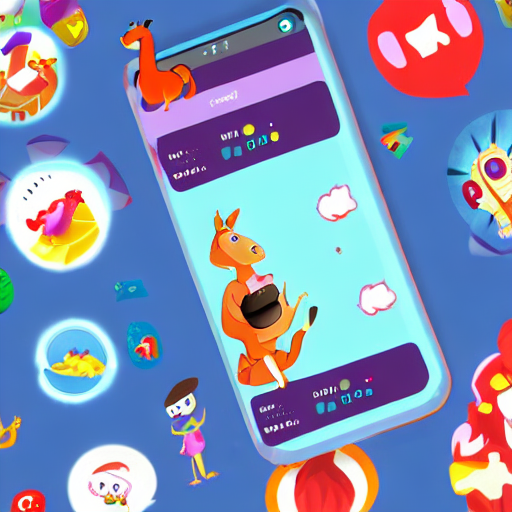

Image saved as 'generated_ui_design.png'
Design generated successfully! You can find it at: generated_ui_design.png
Enter a description for the mobile UI design (or type 'exit' to quit): exit
Exiting the application. Thank you for using the Mobile UI Design Generator!


In [21]:
#create a function to generate the ui design for the prompt with user input, tokenizer, model and pipeline
def generate_ui_design(user_input, tokenizer, model, pipe, guidance_scale=7.5, num_inference_steps=50):
    """Generate a UI design image using Stable Diffusion."""
    # Validate input
    if not validate_input(user_input):
        return None

    # Generate a prompt from the user input
    prompt = generate_prompt(user_input, tokenizer, model)
    print("Generated Prompt:", prompt)

    try:
        # Generate the image based on the prompt
        image = pipe(prompt, guidance_scale=guidance_scale, num_inference_steps=num_inference_steps).images[0]

        # Save and display the generated image
        image.save("generated_ui_design.png")
        display(image)  # Ensure display is defined
        print("Image saved as 'generated_ui_design.png'")

        return "generated_ui_design.png"

    except Exception as e:
        print(f"Error generating image: {e}")
        return None

#create a main function to run the mobile ui design generator

def main():
    print("Welcome to the Mobile UI Design Generator!")

    # Initialize models
    tokenizer, model, pipe = initialize_models()
    if tokenizer is None or model is None or pipe is None:
        print("Failed to initialize models. Exiting.")
        return

    while True:
        # Get user input for the UI design description
        user_input = input("Enter a description for the mobile UI design (or type 'exit' to quit): ")

        # Exit the program if the user types 'exit'
        if user_input.lower() == 'exit':
            print("Exiting the application. Thank you for using the Mobile UI Design Generator!")
            break

        # Generate and display the UI design based on user input
        result = generate_ui_design(user_input, tokenizer, model, pipe)
        if result is None:
            print("Failed to generate the design. Please try again with valid input.")
        else:
            print(f"Design generated successfully! You can find it at: {result}")

# Entry point of the program
if __name__ == "__main__":
    main()
